### Import necessary libraries

In [1]:
# Import necessary libraries for data handling, database interaction, and display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from IPython.display import clear_output

# Clear any previous output in the cell
clear_output()

### Data - HR Data with over 22,000 rows from the year 2000 to 2020.

In [2]:
#import csv as a pandas data frame
url = 'https://raw.githubusercontent.com/Ahmed-M0rsy/HR_Dashboard_Portfolio/main/HR.csv'
df = pd.read_csv(url)
df.head()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,06-04-91,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,04-08-19,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10-12-10,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,04-10-05,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,04-11-94,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan


# **Data Cleaning**

## Rename Columns

In [3]:
# Rename the 'id' column to 'emp_id'
df = df.rename(columns={'id': 'emp_id'})
df = df.rename(columns={'jobtitle': 'job_title'})
df = df.rename(columns={'termdate': 'term_date'})

In [4]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the null counts
null_counts

,0
emp_id,0
first_name,0
last_name,0
birthdate,0
gender,0
race,0
department,0
job_title,0
location,0
hire_date,0


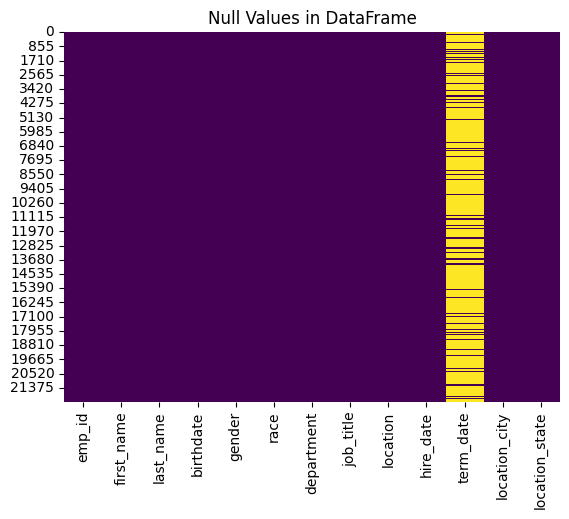

In [5]:
# Visualize null values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values in DataFrame')
plt.show()

## `normalize_dates` Function

This function standardizes date formats within a Pandas DataFrame column to 'YYYY-MM-DD'.

**Purpose:**

The `normalize_dates` function addresses inconsistencies in date formats by converting them into a unified 'YYYY-MM-DD' format. This ensures data consistency and facilitates accurate analysis.

**Parameters:**

- `df` (pd.DataFrame): The input DataFrame containing the date column.
- `column_name` (str): The name of the column containing the dates to be normalized.

**Returns:**

- `pd.DataFrame`: The DataFrame with normalized date formats in the specified column.

**Logic:**

1. **Iteration:** The function iterates through each row of the DataFrame using `df.iterrows()`.
2. **Date Conversion:** For each row, it attempts to convert the date value in the specified column to a datetime object using `pd.to_datetime()`. The `errors='coerce'` argument handles invalid dates by setting them to `NaN`.
3. **Formatting:** If the conversion is successful, the date is formatted to 'YYYY-MM-DD' using `strftime('%Y-%m-%d')`.
4. **Update:** The original DataFrame is updated with the normalized date value.
5. **Error Handling:** If a date conversion error occurs, the function prints an informative message and sets the value to `pd.NaT` (Not a Time).
6. **Return:** Finally, the modified DataFrame is returned.

In [6]:
def normalize_dates(df, column_name):
    """
    Normalize date formats in a specified column of a DataFrame to 'YYYY-MM-DD'.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column containing date values.

    Returns:
    pd.DataFrame: DataFrame with normalized date formats.
    """
    for index, row in df.iterrows():
        try:
            # Attempt to convert the date to 'YYYY-MM-DD'
            original_date = row[column_name]
            new_date = pd.to_datetime(original_date, errors='coerce').strftime('%Y-%m-%d')
            df.loc[index, column_name] = new_date
        except Exception:
            # Handle invalid dates by setting them to NaN
            print(f"Invalid date format for row {index}: {row[column_name]}")
            df.loc[index, column_name] = pd.NaT  # Assign NaN for invalid dates
    return df

In [7]:
# Normalize date formats in a specified column of a DataFrame to 'YYYY-MM-DD'.
normalize_dates(df, 'birthdate')
normalize_dates(df, 'hire_date')
normalize_dates(df, 'term_date')

clear_output()

df

,emp_id,first_name,last_name,birthdate,gender,race,department,job_title,location,hire_date,term_date,location_city,location_state
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,NaT,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,NaT,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,NaT,Cleveland,Ohio
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,NaT,Cleveland,Ohio
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29,Flint,Michigan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,1998-07-08,Female,Hispanic or Latino,Research and Development,Research Assistant I,Headquarters,2012-02-08,NaT,Cleveland,Ohio
22210,99-9869877,Dasie,Thorsby,2001-04-19,Female,Two or More Races,Services,Service Manager,Headquarters,2017-10-06,NaT,Cleveland,Ohio
22211,99-9919822,Nerty,Wilding,2070-02-09,Female,Two or More Races,Training,Junior Trainer,Headquarters,2001-02-08,NaT,Cleveland,Ohio
22212,99-9960380,Mabelle,Dawks,1985-09-02,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,2005-04-03,2012-12-10,Cleveland,Ohio


## `fix_birth_dates` Function
The dataset has potential data entry errors in birth dates where the year might be incorrectly recorded with '20' instead of '19' for individuals with a negative value for age.

### **The Solution**:
The function identifies and corrects these errors:
1.   **Identification**: It flags rows where the employee's age is negative and their birth year starts with '20'.
2.   **Correction**: For flagged rows, it replaces the '20' at the beginning of the birth year with '19'.
3.   **Update**: The DataFrame is updated with the corrected birth dates.


### **Implementation**:
The function uses Pandas DataFrame operations and datetime functions to perform the correction, including error handling for invalid dates.

### **Impact**:
This improves data quality, leading to more reliable age calculations and insights from analysis.

### **Conclusion**:
This approach helps maintain data integrity and improves the reliability of analyses based on the HR dataset, ensuring accurate information for decision-making.

In [8]:
# Calculate the 'age' column based on the 'birthdate' column
df['age'] = pd.to_datetime('today').year - pd.to_datetime(df['birthdate']).dt.year

# Print min and max age
print(f"Minimum age is {df['age'].min()}\nMaximum age is {df['age'].max()}")

Minimum age is -49
Maximum age is 59


In [9]:
def fix_birth_dates(df, birthdate_col='birthdate', age_col='age'):
    """
    Fix incorrect birth dates by replacing '20' with '19' in years for people with negative age

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing birth dates and ages
    birthdate_col : str, default='birthdate'
        Name of the column containing birth dates
    age_col : str, default='age'
        Name of the column containing ages

    Returns:
    --------
    pandas.DataFrame
        DataFrame with corrected birth dates

    Example:
    --------
    >>> df = pd.DataFrame({
    ...     'birthdate': ['2073-03-03', '1995-01-01'],
    ...     'age': [15, 29]
    ... })
    >>> fixed_df = fix_birth_dates(df)
    """
    # Create a copy to avoid modifying the original dataframe
    df_copy = df.copy()

    # Ensure birthdate column is in datetime format
    df_copy[birthdate_col] = pd.to_datetime(df_copy[birthdate_col], errors='coerce')

    # Create mask for rows where age is negative and year starts with '20'
    mask = (df_copy[age_col] < 0) & \
           (df_copy[birthdate_col].dt.strftime('%Y').str.startswith('20', na=False))

    # Function to correct the year
    def correct_year(date):
        if pd.isna(date):
            return date
        year_str = date.strftime('%Y')
        if year_str.startswith('20'):
            new_year = '19' + year_str[2:]
            return date.replace(year=int(new_year))
        return date

    # Apply the correction only to rows matching the mask
    df_copy.loc[mask, birthdate_col] = \
        df_copy.loc[mask, birthdate_col].apply(correct_year)

    return df_copy

In [10]:
df = fix_birth_dates(df)

# Recalculate the 'age' column based on the fixed 'birthdate' column
df['age'] = pd.to_datetime('today').year - pd.to_datetime(df['birthdate']).dt.year

## Check Term_date in future

In [11]:
df['term_date'] = pd.to_datetime(df['term_date'], errors='coerce')

df[df['term_date'] > pd.to_datetime('today')]

,emp_id,first_name,last_name,birthdate,gender,race,department,job_title,location,hire_date,term_date,location_city,location_state,age
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29,Flint,Michigan,30
27,00-1268049,Fay,Monnelly,1966-07-09,Male,Native Hawaiian or Other Pacific Islander,Engineering,Software Engineer I,Headquarters,2010-02-24,2030-03-21,Cleveland,Ohio,58
57,00-2623755,Chrysa,Brownell,1983-04-25,Male,White,Engineering,Administrative Officer,Headquarters,2018-02-22,2027-02-01,Cleveland,Ohio,41
139,00-6479395,Aura,Steagall,1978-07-19,Male,White,Accounting,Staff Accountant I,Headquarters,2013-03-28,2030-02-23,Cleveland,Ohio,46
173,00-8270076,Raphaela,Clowney,1971-11-02,Male,White,Engineering,Computer Systems Analyst I,Remote,2010-03-06,2030-08-03,Warren,Ohio,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22038,99-1005402,Cornela,Livermore,1969-10-14,Female,Two or More Races,Engineering,Software Test Engineer I,Remote,2013-06-02,2030-01-30,Peoria,Illinois,55
22048,99-1707394,Patrick,Musicka,1976-04-23,Female,Two or More Races,Human Resources,Senior Recruiter,Headquarters,2016-11-25,2026-08-01,Cleveland,Ohio,48
22083,99-3706255,Nappy,Burchess,1999-10-22,Male,Native Hawaiian or Other Pacific Islander,Accounting,Budget/Accounting Analyst II,Headquarters,2017-12-31,2035-08-20,Cleveland,Ohio,25
22095,99-4396036,Flory,Hardy-Piggin,1989-03-28,Male,Black or African American,Accounting,Administrative Officer,Remote,2019-03-26,2027-03-03,Fort Wayne,Indiana,35


# Questions

1. [What is the gender breakdown of employees in the company?](#1)
2. [What is the race/ethnicity breakdown of employees in the company?](#2)
3. [What is the age distribution of employees in the company?](#3)
4. [How many employees work at headquarters versus remote locations?](#4)
5. [What is the average length of employment for employees who have been terminated?](#5)
6. [How does the gender distribution vary across departments and job titles?](#6)
7. [What is the distribution of job titles across the company?](#7)
8. [Which department has the highest turnover rate?](#8)
9. [What is the distribution of employees across locations by city and state?](#9)
10. [How has the company's employee count changed over time based on hire and term dates?](#10)
11. [What is the tenure distribution for each department?](#11)

In [12]:
# Check data types of data
df.dtypes

,0
emp_id,object
first_name,object
last_name,object
birthdate,datetime64[ns]
gender,object
race,object
department,object
job_title,object
location,object
hire_date,object


In [13]:
# Fix hire_date data type to datetime
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

### 1. What is the gender breakdown of employees in the company?
<a name="1"></a>

In [14]:
# Gender breakdown of employees in the company

gender_counts = df['gender'].value_counts()
gender_counts

,count
gender,
Male,11288
Female,10321
Non-Conforming,605


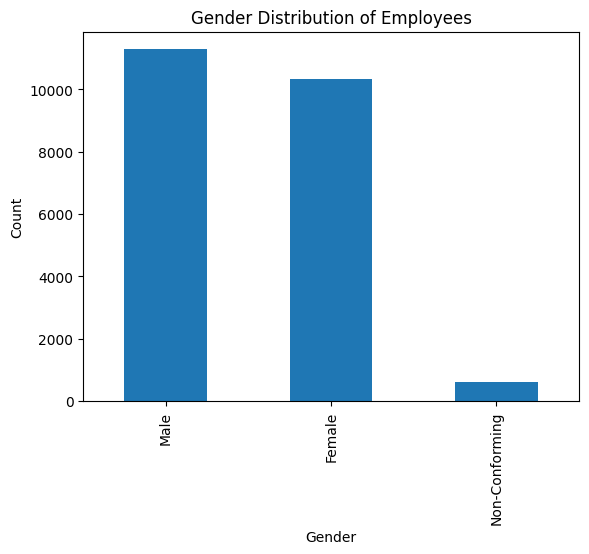

In [15]:
# Bar chart of employee gender distribution
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Employees')
plt.show()

### 2. What is the race/ethnicity breakdown of employees in the company?
<a name="2"></a>

In [16]:
# Race/ethnicity breakdown of employees in the company

race_ethnicity_counts = df['race'].value_counts()
race_ethnicity_counts

,count
race,
White,6328
Two or More Races,3648
Black or African American,3619
Asian,3562
Hispanic or Latino,2501
American Indian or Alaska Native,1327
Native Hawaiian or Other Pacific Islander,1229


### 3. What is the age distribution of employees in the company?
<a name="3"></a>

In [17]:
# Calculate the age distribution
age_distribution = df['age'].value_counts().sort_index()

# Age distribution
age_distribution

,count
age,
22,417
23,644
24,632
25,592
26,568
27,604
28,604
29,589
30,589


In [18]:
# Age group distribution

age_group_counts = df.assign(age_group = (df['age'] // 10) * 10) \
                      .groupby('age_group')['age'].count() \
                      .reset_index(name='count')

age_group_counts

,age_group,count
0,20,4650
1,30,6163
2,40,5888
3,50,5513


In [19]:
# Age group gender distribution

age_group_gender_counts = df.assign(age_group = (df['age'] // 10) * 10) \
                            .groupby(['age_group', 'gender'])['age'].count() \
                            .reset_index(name='count')

age_group_gender_counts

,age_group,gender,count
0,20,Female,2140
1,20,Male,2400
2,20,Non-Conforming,110
3,30,Female,2854
4,30,Male,3130
5,30,Non-Conforming,179
6,40,Female,2699
7,40,Male,3032
8,40,Non-Conforming,157
9,50,Female,2628


In [20]:
age_group_gender_pivot = age_group_gender_counts.pivot(index='age_group', columns='gender', values='count')
age_group_gender_pivot

gender,Female,Male,Non-Conforming
age_group,,,
20,2140,2400,110
30,2854,3130,179
40,2699,3032,157
50,2628,2726,159


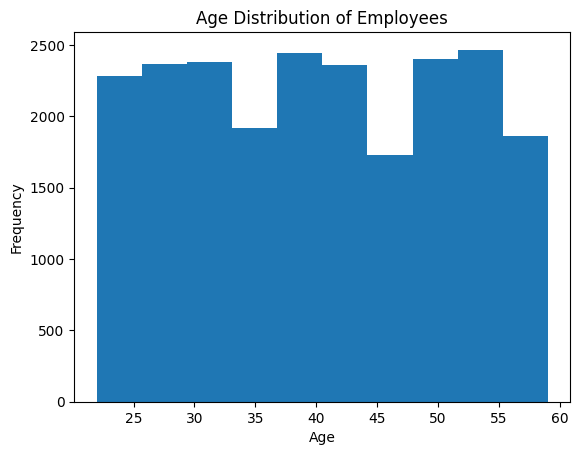

In [21]:
# Histogram of employee age distribution
plt.hist(df['age'], bins=10)  # Adjust 'bins' as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.show()

### 4. How many employees work at headquarters versus remote locations?
<a name="4"></a>

In [22]:
# Employees work on-site vs. remote
location_counts = df['location'].value_counts()
location_counts

,count
location,
Headquarters,16715
Remote,5499


### 5. What is the average length of employment for employees who have been terminated?
<a name="5"></a>

In [23]:
# Calculate employment length for all employees
df['employment_length'] = (df['term_date'] - df['hire_date']).dt.days

# Filter for terminated employees and calculate average employment length
average_employment_length = df[df['term_date'].notna()]['employment_length'].mean()

print(f"The average length of employment for terminated employees is {average_employment_length:.0f} days")

The average length of employment for terminated employees is 3814 days


### 6. How does the gender distribution vary across departments?
<a name="6"></a>

In [24]:
# prompt: How does the gender distribution vary across departments?

# Gender distribution across departments
gender_department_counts = df.groupby(['department', 'gender'])['emp_id'].count().unstack()
gender_department_counts

gender,Female,Male,Non-Conforming
department,,,
Accounting,1531.0,1711.0,91.0
Auditing,24.0,28.0,NaN
Business Development,757.0,836.0,49.0
Engineering,3120.0,3373.0,193.0
Human Resources,861.0,904.0,42.0
Legal,140.0,162.0,9.0
Marketing,233.0,256.0,5.0
Product Management,277.0,349.0,15.0
Research and Development,513.0,531.0,40.0


### 7. What is the distribution of job titles across the company?
<a name="7"></a>

In [25]:
# prompt: What is the distribution of job titles across the company?

# Job title distribution across the company
job_title_distribution = df['job_title'].value_counts()
job_title_distribution

,count
job_title,
Research Assistant II,754
Business Analyst,708
Human Resources Analyst II,613
Research Assistant I,538
Account Executive,505
...,...
Office Assistant II,1
Associate Professor,1
VP of Training and Development,1


### 8. Which department has the highest turnover rate?
<a name="8"></a>
"**Turnover rate**" typically refers to the rate at which employees leave a company or department and need to be replaced. It can be calculated as the number of employees who leave over a given time period divided by the average number of employees in the company or department over that same time period.

In [26]:
# prompt: Which department has the highest turnover rate?

# Calculate the turnover rate for each department
turnover_rate = df.groupby('department')['term_date'].count() / df.groupby('department')['emp_id'].count()

# Find the department with the highest turnover rate
department_highest_turnover = turnover_rate.idxmax()
highest_turnover_rate = turnover_rate.max()

print(f"The department with the highest turnover rate is {department_highest_turnover} with a rate of {highest_turnover_rate:.2%}")

The department with the highest turnover rate is Auditing with a rate of 23.08%


In [27]:
department_data = df.groupby('department')['emp_id'].agg(total_count='count')
department_data['terminated_count'] = df.groupby('department')['term_date'].apply(lambda x: x.notna().sum())
department_data['active_count'] = department_data['total_count'] - department_data['terminated_count']
department_data['termination_rate'] = department_data['terminated_count'] / department_data['total_count']
department_data[['total_count', 'terminated_count', 'active_count', 'termination_rate']]

,total_count,terminated_count,active_count,termination_rate
department,,,,
Accounting,3333,586,2747,0.175818
Auditing,52,12,40,0.230769
Business Development,1642,275,1367,0.167479
Engineering,6686,1185,5501,0.177236
Human Resources,1807,309,1498,0.171002
Legal,311,63,248,0.202572
Marketing,494,72,422,0.145749
Product Management,641,114,527,0.177847
Research and Development,1084,212,872,0.195572


### 9. What is the distribution of employees across locations by state?
<a name="9"></a>

In [28]:
# Employee distribution across locations by state
location_by_state = df.groupby('location_state')['emp_id'].count()
location_by_state

,emp_id
location_state,
Illinois,868
Indiana,700
Kentucky,451
Michigan,673
Ohio,18025
Pennsylvania,1115
Wisconsin,382


### 10. How has the company's employee count changed over time based on hire and term dates?
<a name="10"></a>
This groups the employees by the year of their hire date and calculates the total number of hires, terminations, and net change (the difference between hires and terminations) for each year. The results are sorted by year in ascending order.

In [29]:
# Assuming your DataFrame is named 'df' and contains the necessary columns

# Convert 'hire_date' and 'term_date' to datetime objects if they aren't already
df['hire_date'] = pd.to_datetime(df['hire_date'])
df['term_date'] = pd.to_datetime(df['term_date'], errors='coerce')  # Handle potential errors

# Filter for employees aged 18 or older
filtered_df = df[df['age'] >= 18]

# Extract year from 'hire_date'
filtered_df['hire_year'] = filtered_df['hire_date'].dt.year

# Calculate hires, terminations, net change, and net change percentage
result = filtered_df.groupby('hire_year').agg(
    hires=('emp_id', 'count'),  # Count of hires
    terminations=('term_date', lambda x: x[x.notna()].count()),
    # Count of terminations based on conditions
).reset_index()

result['net_change'] = result['hires'] - result['terminations']  # Calculate net change
result['change_percent'] = round((result['net_change'] / result['hires']) * 100, 2)  # Calculate percentage

# Display the results sorted by year
result = result.sort_values('hire_year', ascending=True)
result

,hire_year,hires,terminations,net_change,change_percent
0,2000,220,31,189,85.91
1,2001,1122,203,919,81.91
2,2002,1067,174,893,83.69
3,2003,1142,203,939,82.22
4,2004,1135,211,924,81.41
5,2005,1097,207,890,81.13
6,2006,1118,221,897,80.23
7,2007,1090,182,908,83.30
8,2008,1108,190,918,82.85
9,2009,1140,201,939,82.37


### 11. What is the tenure distribution for each department?
<a name="11"></a>
How long do employees work in each department before they leave or are made to leave?

In [30]:
# Calculate tenure for each employee in years
df['tenure'] = (df['term_date'] - df['hire_date']).dt.days / 365.25

# Group by department and calculate tenure statistics
tenure_by_department = df.groupby('department')['tenure'].agg(['mean', 'median', 'min', 'max'])

# Sort by mean tenure in descending order
tenure_by_department = tenure_by_department.sort_values('mean', ascending=False)

# Display the tenure distribution for each department
tenure_by_department

,mean,median,min,max
department,,,,
Sales,11.114260,11.879535,0.229979,21.056810
Research and Development,10.895058,11.843943,0.114990,21.029432
Services,10.611162,10.581793,0.106776,20.955510
Engineering,10.570396,10.565366,0.177960,21.081451
Support,10.549150,10.468172,0.136893,20.818617
Business Development,10.493595,10.286105,0.134155,21.084189
Marketing,10.387368,10.080767,0.202601,20.835044
Accounting,10.347277,10.255989,0.095825,21.084189
Human Resources,9.976409,9.620808,0.287474,21.007529


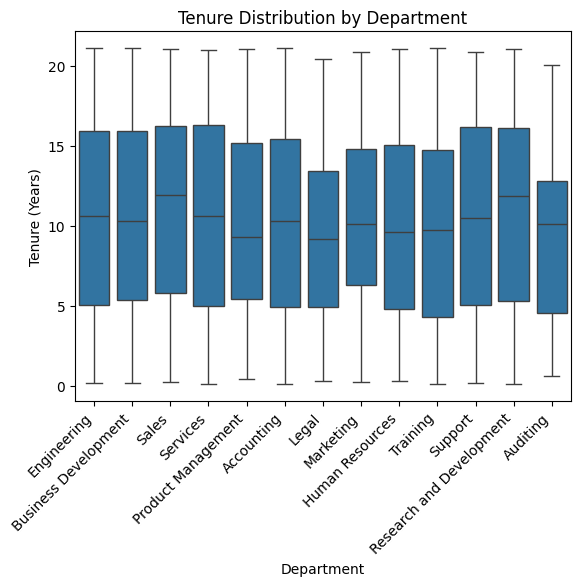

In [31]:
# Box plot of employee tenure by department
sns.boxplot(x='department', y='tenure', data=df)
plt.xlabel('Department')
plt.ylabel('Tenure (Years)')
plt.title('Tenure Distribution by Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

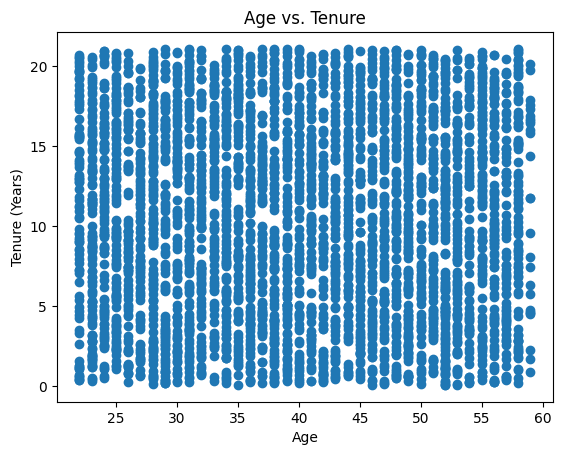

In [32]:
# Scatter plot of age vs. tenure
plt.scatter(df['age'], df['tenure'])
plt.xlabel('Age')
plt.ylabel('Tenure (Years)')
plt.title('Age vs. Tenure')
plt.show()



---



# Summary of Findings
1.	**Gender Distribution**: There are slightly more male employees (11,288) compared to female employees (10,321). Non-conforming employees represent a very small fraction (605).
2.	**Race Distribution**: The majority of employees are White (6,328), followed by Two or More Races (3,648) and Black or African American (3,520). Other races are represented in smaller numbers.
3.	**Age Group Distribution**: The largest age group is 35-44 years (6,142 employees), followed by 25-34 years (5,964). The smallest groups are employees aged 55-64 (2,373) and 65+ (0).
4.	**Location Distribution**: A large number of employees (16,715) work at the Headquarters compared to Remote locations (5,499).
5.	**Average Tenure**: The overall average tenure for employees is approximately 13 years.

In [33]:
df.head()

,emp_id,first_name,last_name,birthdate,gender,race,department,job_title,location,hire_date,term_date,location_city,location_state,age,employment_length,tenure
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,NaT,Cleveland,Ohio,33,NaN,NaN
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,NaT,Cleveland,Ohio,40,NaN,NaN
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,NaT,Cleveland,Ohio,35,NaN,NaN
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,NaT,Cleveland,Ohio,42,NaN,NaN
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29,Flint,Michigan,30,6970.0,19.08282


In [34]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the specified categorical columns
for column in ['gender', 'race', 'department', 'job_title', 'location', 'location_city', 'location_state']:
    df[column + '_encoded'] = encoder.fit_transform(df[column])

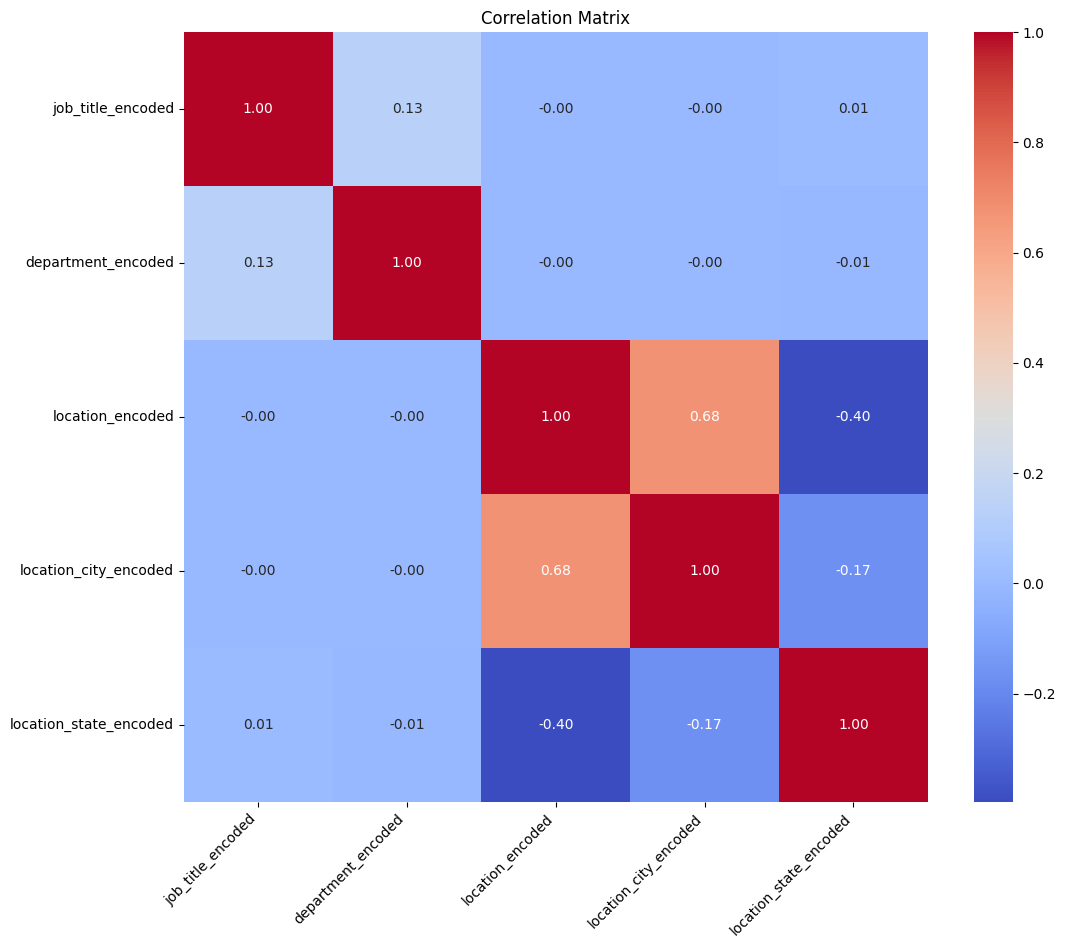

In [35]:
# Select the desired columns for the correlation matrix
selected_columns = ['job_title_encoded', 'department_encoded', 'location_encoded',
                    'location_city_encoded', 'location_state_encoded']

# Create a subset of the DataFrame with the selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.yticks(rotation=0)  # Keep y-axis labels vertical
plt.show()